420 380
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

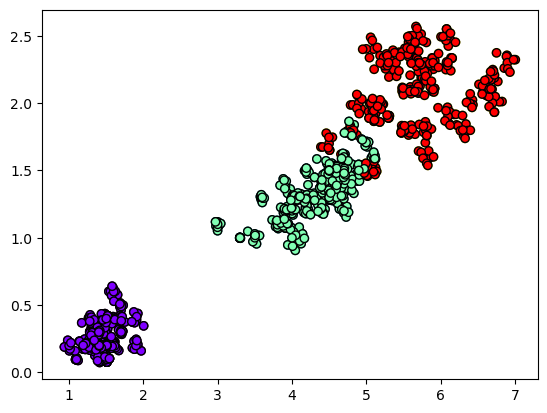

In [184]:
# X Implementing a simple NN
import numpy as np
import matplotlib.pyplot as plt
import os

# os.chdir("C:/Users/Manue/Documents/Practical Deeplearning")

X_train = np.load('iris/iris_train_features_augmented.npy')
X_test = np.load('iris/iris_test_features_augmented.npy')
y_train = np.load('iris/iris_train_labels_augmented.npy')
y_test = np.load('iris/iris_test_labels_augmented.npy')

plt.scatter(X_train[:,2], X_train[:,3], c=y_train)
# Implementing NN
# Datensatz umstrukturieren, sodass nur zwei features enthalten sind
plt.scatter(X_train[:,2], X_train[:,3], c=y_train, cmap="rainbow", edgecolor="black")

d1 = X_train[np.where(y_train==1)]
d2 = X_train[np.where(y_train==2)]
a = len(d1)
b = len(d2) 
print(a, b)

# Nur zwei Features beibehalten im neuen Datensatz
X_train = np.zeros((a+b, 2))
X_train[:a, :] = d1[:,2:]
X_train[a:, :] = d2[:,2:]

# Erstellt Vektor mit Trainingslabeln und randomisiert Zeilen
y_train = np.array([0]*a+[1]*b)
print(y_train)
idx = np.argsort(np.random.random(a+b))
y_train = y_train[idx]
X_train = X_train[idx, :]

# Speichern
np.save('iris/iris2_train.npy', X_train)
np.save("iris/iris2_train_labels.npy", y_train)


# Wiedehrolung mit dem Testdatensatz
d1 = X_test[np.where(y_test==1)]
d2 = X_test[np.where(y_test==2)]
a = len(d1)
b = len(d2) 
print(a, b)

# Nur zwei Features beibehalten im neuen Datensatz
X_test = np.zeros((a+b, 2))
X_test[:a, :] = d1[:,2:]
X_test[a:, :] = d2[:,2:]

# Erstellt Vektor mit Testlabeln und randomisiert Zeilen
y_test = np.array([0]*a+[1]*b)
i = np.argsort(np.random.random(X_test.shape[0]))
y_test = y_test[i]
X_test = X_test[i, :]

print(y_test)

# Speichern
np.save('iris/iris2_test.npy', X_test)
np.save("iris/iris2_test_labels.npy", y_test)


# PLotten des Trianingssets




In [142]:
# Training and Testing a Neural Network
import pickle
import sys

# X Das neuronale Netzwerk
# sigmoid Funktion
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# evaluate entspricht der Operation des neuronalen Netzwerks
def evaluate(x, y, w):
    w12, b1, w23, b2, w34, b3 = w
    nc = nw = 0
    prob = np.zeros(len(y))
    for i in range(len(y)):
        # Input zu Ebende 1
        a1 = sigmoid(np.dot(x[i], w12) + b1)
        # Ebene 1 zu Ebene 2
        a2 = sigmoid(np.dot(a1, w23) + b2)
        # Ebene 2 zu Output - Ebene
        prob[i] = sigmoid(np.dot(a2, w34) + b3)
        z = 0 if prob[i] < 0.5 else 1
        if (z == y[i]):
            nc += 1
        else:
            nw += 1
    return [float(nc) / float(nc + nw), prob]

# Nachfolgender Code wird verwendet, um die weights und biases als Liste zu laden,
# nachdem diese von Python berechnet und als .pkl Datei gespeichert wurden... funktioniert jetzt noch nicht
weights = pickle.load(open("iris/iris2_weights.pkl", "rb"))

# X Ergebnisse Berechnen
# Datensatz durch das neuronale Netzwerk senden
score, prob = evaluate(X_test, y_test, weights)
print()

# X Ergebniss-Darstellung
# Gibt die ID-Nummer, das Label, das vorhergesagte Label und die Wahrscheinlichkeit aus
for i in range(len(prob)):
    print("%3d: actual: %d predict: %d prob: %0.7f" %
    (i, y_test[i], 0 if (prob[i] < 0.5) else 1, prob[i]))
print("Score = %0.4f" % score)




  0: actual: 0 predict: 0 prob: 0.1004615
  1: actual: 0 predict: 0 prob: 0.0050329
  2: actual: 1 predict: 1 prob: 0.9974510
  3: actual: 1 predict: 1 prob: 0.9953066
  4: actual: 1 predict: 1 prob: 0.9662478
  5: actual: 0 predict: 1 prob: 0.7732957
  6: actual: 0 predict: 0 prob: 0.0050000
  7: actual: 1 predict: 1 prob: 0.8657670
  8: actual: 1 predict: 1 prob: 0.9982761
  9: actual: 0 predict: 0 prob: 0.0069895
 10: actual: 0 predict: 0 prob: 0.0393407
 11: actual: 0 predict: 0 prob: 0.0082448
 12: actual: 1 predict: 1 prob: 0.9955880
Score = 0.9231


C:\Users\Manue\AppData\Local\Temp\ipykernel_29444\4100510107.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob[i] = sigmoid(np.dot(a2, w34) + b3)


In [186]:
# Training und Testen des NN

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    hidden_layer_sizes=(3,2),
    activation="logistic",
    solver="adam", tol=1e-9,
    max_iter=5000,
    verbose=True
)

clf.fit(X_train, y_train)
prob = clf.predict_proba(X_test)
score = clf.score(X_test, y_test)

# Speichern der Koeffizienten in eine Liste
w12 = clf.coefs_[0]
w23 = clf.coefs_[1]
w34 = clf.coefs_[2]
b1 = clf.intercepts_[0]
b2 = clf.intercepts_[1]
b3 = clf.intercepts_[2]

weights = [w12, b1, w23, b2, w34, b3]
pickle.dump(weights, open('iris/iris2_weights.pkl', "wb"))

Iteration 1, loss = 0.70660123
Iteration 2, loss = 0.70563331
Iteration 3, loss = 0.70479623
Iteration 4, loss = 0.70387765
Iteration 5, loss = 0.70306621
Iteration 6, loss = 0.70228264
Iteration 7, loss = 0.70159633
Iteration 8, loss = 0.70081091
Iteration 9, loss = 0.70018079
Iteration 10, loss = 0.69947586
Iteration 11, loss = 0.69885507
Iteration 12, loss = 0.69832774
Iteration 13, loss = 0.69785366
Iteration 14, loss = 0.69724832
Iteration 15, loss = 0.69671972
Iteration 16, loss = 0.69629895
Iteration 17, loss = 0.69586691
Iteration 18, loss = 0.69540080
Iteration 19, loss = 0.69507866
Iteration 20, loss = 0.69474627
Iteration 21, loss = 0.69430569
Iteration 22, loss = 0.69400105
Iteration 23, loss = 0.69372871
Iteration 24, loss = 0.69335984
Iteration 25, loss = 0.69317222
Iteration 26, loss = 0.69287346
Iteration 27, loss = 0.69261660
Iteration 28, loss = 0.69240224
Iteration 29, loss = 0.69220052
Iteration 30, loss = 0.69200762
Iteration 31, loss = 0.69177314
Iteration 32, los

In [188]:
# Ergebnisdarstellung
print()
print("Test results:")
print(" Overall score: %0.7f" % score)
print()
# Fallweise Ergebnisdarstellung
for i in range(len(y_test)):
     p = 0 if (prob[i,1] < 0.5) else 1
     print("%03d: %d - %d, %0.7f" % (i, y_test[i], p, prob[i,1]))
print()


Test results:
 Overall score: 0.9500000

000: 0 - 0, 0.0055703
001: 1 - 1, 0.9923561
002: 0 - 0, 0.0299737
003: 1 - 1, 0.8485935
004: 1 - 1, 0.8485935
005: 1 - 0, 0.4209973
006: 1 - 1, 0.9721248
007: 1 - 1, 0.9473161
008: 1 - 1, 0.9840221
009: 1 - 1, 0.9914521
010: 1 - 1, 0.9110989
011: 1 - 1, 0.9950144
012: 0 - 0, 0.0032615
013: 0 - 0, 0.0075935
014: 1 - 1, 0.9919711
015: 0 - 0, 0.1090036
016: 1 - 1, 0.9889730
017: 0 - 0, 0.0034073
018: 0 - 0, 0.0033237
019: 0 - 0, 0.0412714

